## Erdos-Renyi-SC-Refined Rates Test 7 

### TODO: try clique complex (with full triangles only)

In [19]:
import numpy as np
import matplotlib.pylab as plt
import random
from scipy.special import comb

import sys
sys.path.append('../src/')
from higher_order_structures import ErdosRenyiSC
from simulate_gillespie import *
from estimate_total_rates import *

## Setup

In [20]:
# new setup for clique complex
N = 1000
d2 = 2
p2 = 2 * d2 / ((N - 1)*(N - 2))
print(f"{p2:.8f}")

d1 = (N - 1) * ( 1 - np.pow(1 - p2, N - 2) )
print(f"d1 = {d1:.2f}, d2 = {d2}")

0.00000401
d1 = 3.99, d2 = 2


In [17]:
# new setup for clique complex
N = 1000
d2 = 5
p2 = 2 * d2 / ((N - 1)*(N - 2))
print(f"{p2:.8f}")

d1 = (N - 1) * ( 1 - np.pow(1 - p2, N - 2) )
print(f"d1 = {d1:.2f}, d2 = {d2}")

0.00001003
d1 = 9.95, d2 = 5


In [18]:
# new setup for clique complex
N = 1000
d2 = 10
p2 = 2 * d2 / ((N - 1)*(N - 2))
print(f"{p2:.8f}")

d1 = (N - 1) * ( 1 - np.pow(1 - p2, N - 2) )
print(f"d1 = {d1:.2f}, d2 = {d2}")

0.00002006
d1 = 19.80, d2 = 10


In [21]:
from higher_order_generators import get_p1_p2_for_target_degrees_precise

In [22]:
N = 1000
# old targets 20, 6
# new targets: 7, 2
# (10, 4), (7, 3), (7, 1)
d1_d2_list = [(20, 6), (11, 2), (10, 2), (10, 1), (9, 2), (12, 2)]
for d1, d2 in d1_d2_list:
    p_G, p_Delta = get_p1_p2_for_target_degrees_precise(d1, d2, N)
    print(p_G > np.log(N)/N)

True
True
False
True
False
True


In [23]:
d1, d2 = (12, 2)  # try 12, 2
g = ErdosRenyiSC(N, d1, d2)

In [24]:
g.print()

	Erdos-Renyi-SC on 1000 nodes with 6710 edges.



In [25]:
g.summary()

	Target d1: 12.00, Realized d1: 12.05
	Target d2: 2.00, Realized d2: 2.05

	Target p1:  0.01201201, Realized p1: 0.01206406
	Target p2:  0.00000401, Realized p2: 0.00000412

	Initial p_G used for G(N, p_G): 0.00804817

	Realized number of pw edges:  6026/499500
	Realized number of ho edges:  684/166167000

	Is valid SC: True




In [29]:
all_edges = g.edges
all_edges[:5], all_edges[-5:]

([(170, 560), (538, 727), (197, 397), (21, 208), (153, 327)],
 [(48, 100, 575),
  (310, 392, 964),
  (68, 674, 727),
  (257, 510, 644),
  (148, 568, 694)])

In [ ]:
sys.path.append('../scripts/')

from generators_sc_test import check_full_triangle_property

edges_pw = g.get_edges(1)
edges_ho = g.get_edges(2)

check_full_triangle_property(edges_pw, edges_ho)

all_edges = g.edges
# convert to sorted tuples for lookup
edge_set = {tuple(sorted(edge)) for edge in all_edges if len(edge) == 2}
triangle_set = {tuple(sorted(triangle)) for triangle in all_edges if len(triangle) == 3}

# determine the node set 
all_nodes_in_edges = set(node for edge in edge_set for node in edge)
all_nodes_in_triangles = set(node for triangle in triangle_set for node in triangle)
all_nodes = all_nodes_in_edges.union(all_nodes_in_triangles)
node_list = sorted(list(all_nodes)) # Iterate over sorted nodes
node_list[:5], node_list[-5:]

([0, 1, 2, 3, 4], [995, 996, 997, 998, 999])

In [31]:
empty_triangles_found = []
# go over all possible 3-cliques based on node_list
for i_idx, node_i in enumerate(node_list):
    # consider j > i and k > j to avoid duplicates
    for j_idx in range(i_idx + 1, len(node_list)):
        node_j = node_list[j_idx]
        # check if edge {i, j} exists
        edge_ij = tuple(sorted((node_i, node_j)))
        if edge_ij not in edge_set:
            continue # not even a path i, j
        for k_idx in range(j_idx + 1, len(node_list)):
            node_k = node_list[k_idx]
            # check if unique triple forms a 3-clique
            edge_ik = tuple(sorted((node_i, node_k)))
            edge_jk = tuple(sorted((node_j, node_k)))
            # all pairwise edges exist
            is_3_clique = (edge_ij in edge_set and
                            edge_ik in edge_set and
                            edge_jk in edge_set)
            if is_3_clique:
                # now check if it is a "full triangle"
                potential_empty_triangle = tuple(sorted((node_i, node_j, node_k)))
                if potential_empty_triangle not in triangle_set:
                    empty_triangles_found.append(potential_empty_triangle)
empty_triangles_found                    

[(1, 14, 901),
 (2, 155, 329),
 (2, 155, 347),
 (2, 155, 581),
 (4, 101, 548),
 (4, 165, 351),
 (4, 273, 828),
 (8, 141, 342),
 (10, 463, 954),
 (12, 15, 523),
 (12, 81, 949),
 (12, 560, 674),
 (13, 145, 974),
 (13, 217, 730),
 (15, 91, 523),
 (15, 397, 523),
 (16, 372, 490),
 (19, 39, 919),
 (20, 190, 633),
 (20, 252, 543),
 (24, 43, 627),
 (24, 104, 375),
 (27, 101, 464),
 (27, 259, 501),
 (27, 259, 950),
 (27, 289, 432),
 (29, 420, 687),
 (30, 673, 969),
 (33, 67, 459),
 (33, 459, 698),
 (35, 71, 653),
 (35, 132, 527),
 (37, 442, 649),
 (39, 349, 505),
 (39, 505, 599),
 (40, 538, 632),
 (41, 936, 995),
 (43, 199, 436),
 (45, 218, 428),
 (45, 416, 727),
 (46, 520, 919),
 (47, 352, 414),
 (47, 850, 963),
 (51, 98, 206),
 (52, 714, 941),
 (54, 55, 960),
 (54, 456, 593),
 (58, 233, 492),
 (58, 368, 492),
 (59, 635, 845),
 (61, 789, 869),
 (61, 789, 998),
 (63, 418, 907),
 (63, 418, 928),
 (64, 746, 933),
 (66, 329, 935),
 (67, 481, 484),
 (67, 481, 752),
 (69, 811, 983),
 (71, 297, 450)

In [32]:
len(empty_triangles_found)

305

In [33]:
all_edges = g.edges + empty_triangles_found
len(all_edges)

7015

In [34]:
g.set_edges(all_edges)

In [35]:
from generators_sc_test import check_full_triangle_property

edges_pw = g.get_edges(1)
edges_ho = g.get_edges(2)

check_full_triangle_property(edges_pw, edges_ho)

True

In [36]:
test_name = "random_ER_CC"

I0 = 10
nsims = 100 # TODO: test with 500
run_gillespie_simulations = True
time_max = 50

# set beta1, beta2 such that k^* = .75 N
mu    = 1             # recovery rate

# TODO: 
# Try with 
# lambda_1 \in [1, 1.3, 1.5]
# lambda_2 \in [2, 5]
lambda1 = 1.2 # <- increase lambda
lambda2 = 4

beta1 = lambda1 * mu / d1 # pairwise infection rate
beta2 = lambda2 * mu / d2 # hyperedge contagion rate

# g.summary()

print(f"{test_name}: \n")
print(f"\tH = {g.name}, N = {N}, (d1, d2) = {(d1, d2)}, I0 = {I0}, time_max = {time_max},")
g.print()

print(f"\tbeta1 * N = {beta1 * N:.2f}, beta2 * N^2 = {beta2 * (N**2):.2f}, mu = {mu},")
print(f"\twith estimation based on {nsims} Gillespie simulation runs\n")

random_ER_CC: 

	H = Erdos-Renyi-SC, N = 1000, (d1, d2) = (12, 2), I0 = 10, time_max = 50,
	Erdos-Renyi-SC on 1000 nodes with 7015 edges.

	beta1 * N = 100.00, beta2 * N^2 = 2000000.00, mu = 1,
	with estimation based on 100 Gillespie simulation runs



## Run Gillespie

exited on time=50.00037351551792, waiting_time=0.0004641542610575615
exited on time=50.000280101387645, waiting_time=0.0003310730835442297
exited on time=50.00001341477063, waiting_time=2.952436064293737e-05
exited on time=50.00140824596561, waiting_time=0.0014686904273694713
exited on time=50.00004599240767, waiting_time=0.0014209812537521083
exited on time=50.0024768221369, waiting_time=0.0033908289486639163
exited on time=50.00033047628824, waiting_time=0.0007209817896081559
exited on time=50.000282409390884, waiting_time=0.0008038259486441486
exited on time=50.00086157362171, waiting_time=0.0009736940538402007
exited on time=50.00137580522778, waiting_time=0.0017604900704870584
exited on time=50.00019565132253, waiting_time=0.0010512213103676528
exited on time=50.00010885238297, waiting_time=0.0009129848488204562
break: total_infected == 0: 0, time=1.0982998091377734
exited on time=50.000157647314445, waiting_time=0.0024864968696224144
exited on time=50.00106164904829, waiting_time

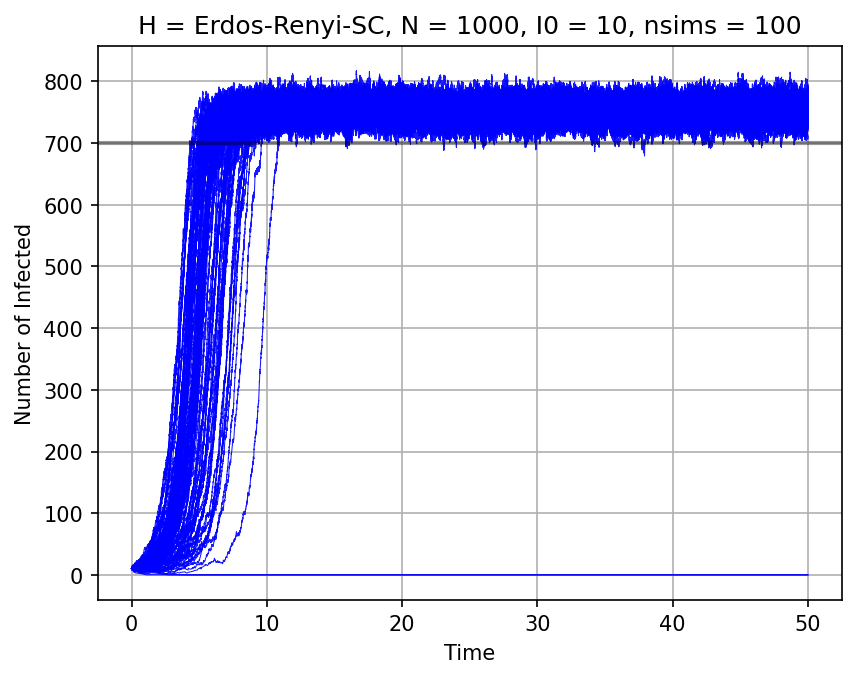

In [ ]:
## --- Run Gillespie ---
run_gillespie_simulations = False

I0_gillespie = I0 # TODO: go over the range when necessary
nodes = list(g.nodes.keys())
initial_infections = random.sample(nodes, I0)

if run_gillespie_simulations: 
    X_sims = []
    for _ in range(nsims):
        X_t = gillespie_sim(g, beta1, beta2, mu, initial_infections, time_max)
        X_sims.append(X_t)

    # save the simulation results
    sim_results = {f'sim_{i}': X_sims[i] for i in range(nsims)}
    np.savez_compressed(f'../results/gillespie-sims_{test_name}_I0={I0}.npz', **sim_results)
else: 
    # load simulation results
    sim_results = np.load(f'../results/gillespie-sims_{test_name}_I0={I0}.npz', allow_pickle=True)
    X_sims = [sim_results[f'sim_{i}'] for i in range(nsims)]

# plot X_t curves in gray and average curve in red
fig = plt.figure(dpi=150) # set DPI
ax  = plt.subplot()

for X_t in X_sims:
    ax.plot(X_t[0], X_t[2], c="blue", alpha=0.9, linewidth=0.5, rasterized=True)

plt.axhline(y=int(0.7 * N), color='black', lw=2, alpha=0.4, linestyle='-')

avg_curve, times = get_average(X_sims, time_max, len(X_sims), delta_t = 0.01)

plt.xlabel("Time")
plt.ylabel("Number of Infected")
plt.grid(True)
plt.title(f"H = {g.name}, N = {N}, I0 = {I0}, nsims = {nsims}")
plt.savefig(f"../figures/estimation/{test_name}/gillespie-sims-I0=10.pdf", 
            format='pdf', bbox_inches='tight')
plt.show()
plt.close(fig) # free up memory

## Burn-in / alignment approach

In [38]:
times

NameError: name 'times' is not defined

## Solve KEs and compare

In [68]:
d1, d2

(12, 2)

In [69]:
target_p1 = d1 / (N - 1.0)
target_p2 = (2.0 * d2) / ((N - 1.0) * (N - 2.0))
target_p1, target_p2

(0.012012012012012012, 4.0120280601242526e-06)

In [ ]:
target_p1 = d1 / (N - 1.0)
target_p2 = (2.0 * d2) / ((N - 1.0) * (N - 2.0))

I0 = 10

# solve KEs and compare
all_states = list(range(N + 1))
M = len(all_states)
# ode_system_complete = list_all_ODEs_complete(g, beta1, beta2, mu)
ode_system_random = list_all_ODEs_random(g, beta1, beta2, mu, target_p1, target_p2)

# set the initial condition
p0 = np.zeros(M)
i_set0 = all_states.index(I0)
p0[i_set0] = 1.0 # all other states have prob 0 at time 0
# p0

In [ ]:
# solve ode_system_random over time
t_span = (0.0, time_max)

# times t_i to evaluate in, get saved in sol.t
steps_eval = 202
t_eval = np.linspace(t_span[0], t_span[1], steps_eval)

def f_ode(t, p):
    return ode_system_random(t, p)

sol = solve_ivp(f_ode, 
                t_span, 
                p0, 
                t_eval=t_eval,
                method="LSODA")

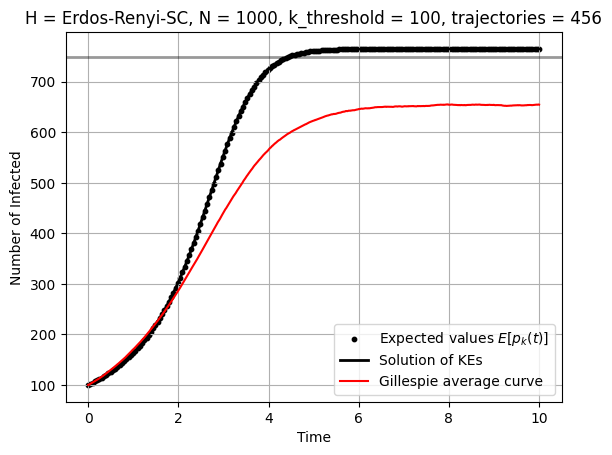

In [ ]:
# plot both the expected values of p_{k}(t) 
# and the Gillespie average curve
# on the same figure

expected_values = calculate_expected_values(sol)

plt.figure()
plt.scatter(sol.t, expected_values, s = 10, color="k", 
            label=r"Expected values $E[p_{k}(t)]$")
plt.plot(sol.t, expected_values, lw=2, color="k", label="Solution of KEs")
plt.plot(times, avg_curve, 'red', label="Gillespie average curve")

plt.axhline(y=int(0.75 * N), color='black', lw=2, alpha=0.4, linestyle='-')

plt.xlabel("Time")
plt.ylabel("Number of Infected")
plt.legend()
plt.grid(True)
plt.title(f"H = {g.name}, N = {N}, k_threshold = {k_threshold}, trajectories = {len(X_sims)}")
plt.savefig(f"../figures/estimation/{test_name}/solution-vs-gillepsie_I0=10.pdf", 
            format='pdf', bbox_inches='tight')
plt.show()

## Calculate the estimates

In [ ]:
## --- Calculate the estimates ---
min_Tk_threshold = 1e-6
estimates = calculate_estimates(X_sims, N, min_Tk_threshold)

Total events processed: 4881728


In [74]:
estimates

{'a_k_hat': array([0., 0., 0., ..., 0., 0., 0.], shape=(1001,)),
 'b_k_hat': array([0., 0., 0., ..., 0., 0., 0.], shape=(1001,)),
 'c_k_hat': array([0., 0., 0., ..., 0., 0., 0.], shape=(1001,)),
 'lambda_k_hat': array([0., 0., 0., ..., 0., 0., 0.], shape=(1001,)),
 'T_k': array([0., 0., 0., ..., 0., 0., 0.], shape=(1001,)),
 'U_k': array([0., 0., 0., ..., 0., 0., 0.], shape=(1001,)),
 'V_k': array([0., 0., 0., ..., 0., 0., 0.], shape=(1001,)),
 'D_k': array([0., 0., 0., ..., 0., 0., 0.], shape=(1001,))}

In [ ]:
estimates = calculate_estimates(X_sims, N, min_Tk_threshold)

Total events processed: 4881728


In [76]:
estimates

{'a_k_hat': array([0., 0., 0., ..., 0., 0., 0.], shape=(1001,)),
 'b_k_hat': array([0., 0., 0., ..., 0., 0., 0.], shape=(1001,)),
 'c_k_hat': array([0., 0., 0., ..., 0., 0., 0.], shape=(1001,)),
 'lambda_k_hat': array([0., 0., 0., ..., 0., 0., 0.], shape=(1001,)),
 'T_k': array([0., 0., 0., ..., 0., 0., 0.], shape=(1001,)),
 'U_k': array([0., 0., 0., ..., 0., 0., 0.], shape=(1001,)),
 'V_k': array([0., 0., 0., ..., 0., 0., 0.], shape=(1001,)),
 'D_k': array([0., 0., 0., ..., 0., 0., 0.], shape=(1001,))}

In [77]:
np.nanmean(estimates["a_k_hat"], axis=0)

np.float64(149.68909686558297)

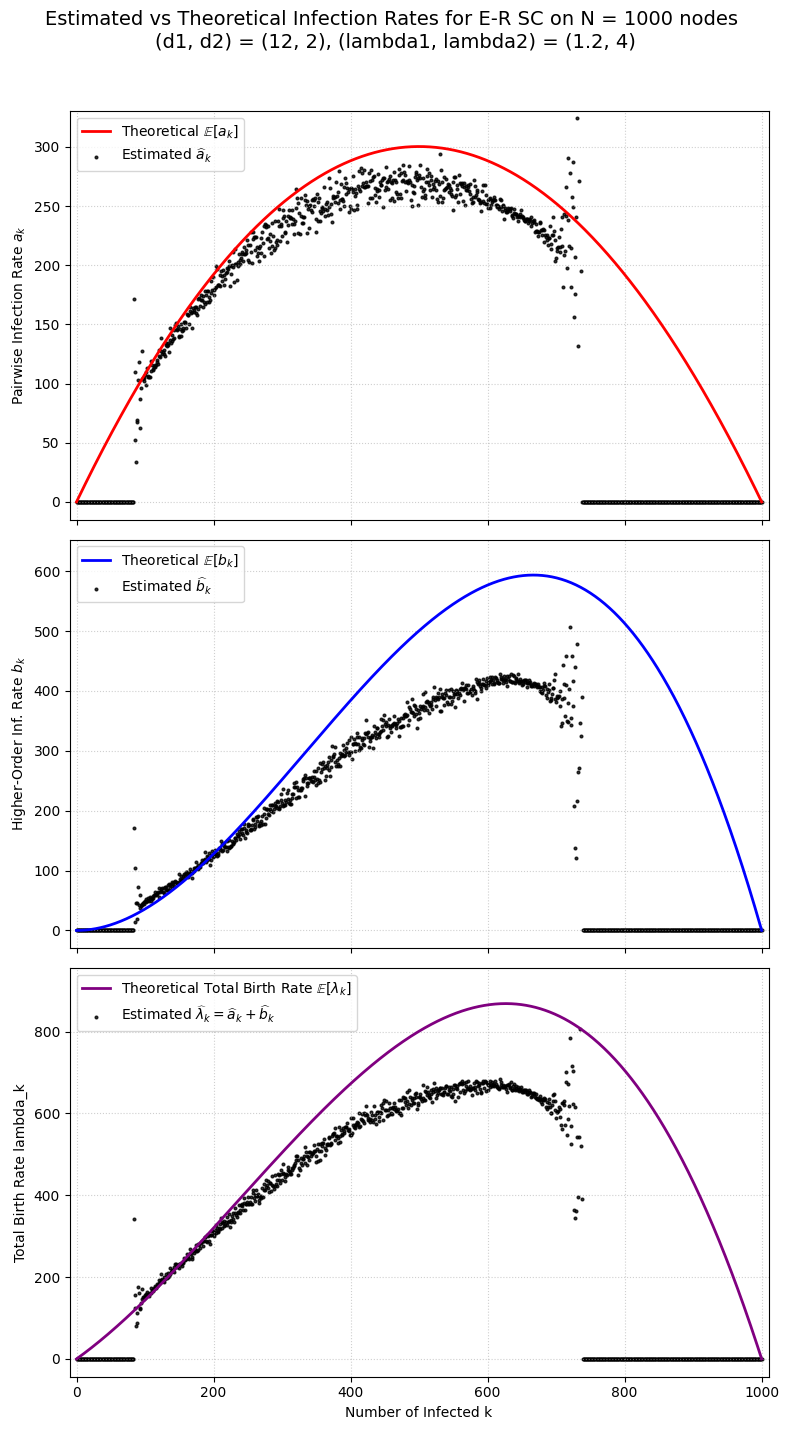

In [78]:
ak_hat_point_estimates = estimates["a_k_hat"]
bk_hat_point_estimates = estimates["b_k_hat"]
lambda_k_hat_point_estimates = estimates["lambda_k_hat"]

plot_valid_k_idx = ~np.isnan(ak_hat_point_estimates)

# theoretical (expected) rates for ER-SC
k_values = np.arange(N + 1)
k_choose_2 = np.array([comb(k, 2, exact=True) if k >= 2 else 0 for k in k_values], dtype=float)
a_k_theoretical = beta1 * target_p1 * k_values * (N - k_values)
b_k_theoretical = beta2 * target_p2 * k_choose_2 * (N - k_values)
total_birth_k_theoretical = a_k_theoretical + b_k_theoretical

fig, axes = plt.subplots(3, 1, figsize=(8, 15), sharex=True)
title = f"Estimated vs Theoretical Infection Rates for E-R SC on N = {N} nodes \n"
title += f"(d1, d2) = ({d1}, {d2}), (lambda1, lambda2) = ({lambda1}, {lambda2})"
fig.suptitle(title, fontsize=14)

# PW rates a_k
axes[0].plot(k_values, a_k_theoretical, color="red", linestyle='-', linewidth=2,
             label=r'Theoretical $\mathbb{E}[a_k]$')
axes[0].scatter(k_values[plot_valid_k_idx], ak_hat_point_estimates[plot_valid_k_idx],
                color="black", marker='.', s=15, alpha=0.8,
                label=r'Estimated $\widehat{a}_k$')
axes[0].set_ylabel("Pairwise Infection Rate $a_k$")
axes[0].legend(loc='upper left')
axes[0].grid(True, linestyle=':', alpha=0.6)

min_y_ak = np.nanmin(ak_hat_point_estimates[plot_valid_k_idx]) if np.any(plot_valid_k_idx) else 0
max_y_ak_theory = np.nanmax(a_k_theoretical)
axes[0].set_ylim(bottom=min(0, min_y_ak) - 0.05 * max_y_ak_theory,
                 top=max_y_ak_theory * 1.1 if max_y_ak_theory > 0 else 0.1)


# HO rates b_k
axes[1].plot(k_values, b_k_theoretical, color="blue", linestyle='-', linewidth=2,
             label=r'Theoretical $\mathbb{E}[b_k]$')
axes[1].scatter(k_values[plot_valid_k_idx], bk_hat_point_estimates[plot_valid_k_idx],
                color="black", marker='.', s=15, alpha=0.8,
                label=r'Estimated $\widehat{b}_k$')
axes[1].set_ylabel("Higher-Order Inf. Rate $b_k$")
axes[1].legend(loc='upper left')
axes[1].grid(True, linestyle=':', alpha=0.6)
min_y_bk = np.nanmin(bk_hat_point_estimates[plot_valid_k_idx]) if np.any(plot_valid_k_idx) else 0
max_y_bk_theory = np.nanmax(b_k_theoretical)
axes[1].set_ylim(bottom=min(0, min_y_bk) - 0.05 * max_y_bk_theory,
                 top=max_y_bk_theory * 1.1 if max_y_bk_theory > 0 else 0.1)


# total birth rates lambda_k = a_k + b_k
axes[2].plot(k_values, total_birth_k_theoretical, color="purple", linestyle='-', linewidth=2,
             label=r'Theoretical Total Birth Rate $\mathbb{E}[\lambda_k]$')
axes[2].scatter(k_values[plot_valid_k_idx], lambda_k_hat_point_estimates[plot_valid_k_idx],
                color="black", marker='.', s=15, alpha=0.8,
                label=r'Estimated $\widehat{\lambda}_k = \widehat{a}_k + \widehat{b}_k$')
axes[2].set_ylabel("Total Birth Rate lambda_k")
axes[2].legend(loc='upper left')
axes[2].grid(True, linestyle=':', alpha=0.6)
min_y_lk = np.nanmin(lambda_k_hat_point_estimates[plot_valid_k_idx]) if np.any(plot_valid_k_idx) else 0
max_y_lk_theory = np.nanmax(total_birth_k_theoretical)
axes[2].set_ylim(bottom=min(0, min_y_lk) - 0.05 * max_y_lk_theory,
                 top=max_y_lk_theory * 1.1 if max_y_lk_theory > 0 else 0.1)


axes[2].set_xlabel("Number of Infected k")
for ax_item in axes:
    ax_item.set_xlim(left=-N*0.01, right=N*1.01)

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.savefig(f"../figures/estimation/{test_name}/supporting_fig_ER_SC_rates.pdf", 
            format='pdf', bbox_inches='tight')
plt.show()
plt.close(fig)

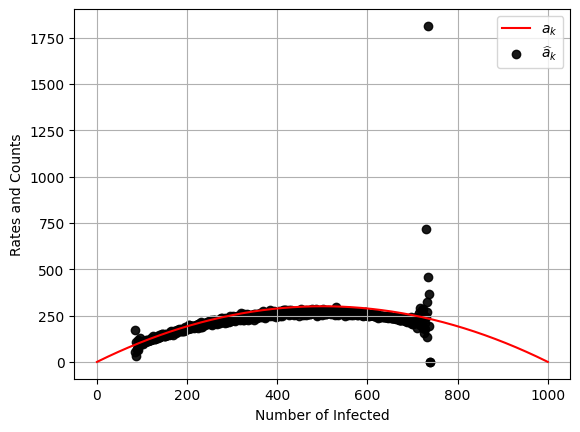

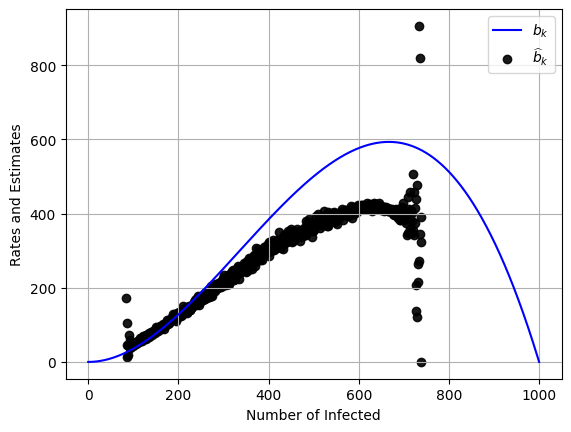

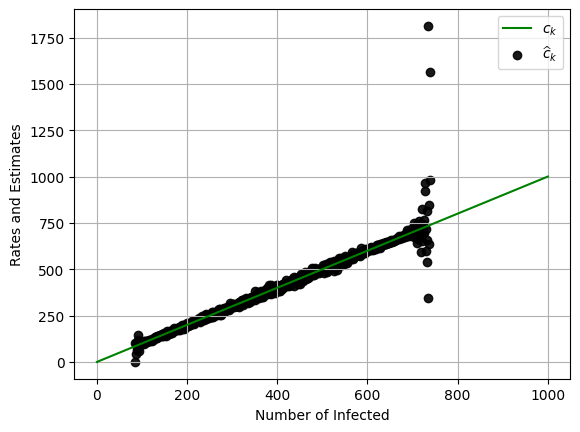

In [79]:
a_k_hat = estimates["a_k_hat"]
b_k_hat = estimates["b_k_hat"]
c_k_hat = estimates["c_k_hat"]

# plot only where T_k was non-zero!
valid_k_idx = estimates["T_k"] > min_Tk_threshold   

# and compare them to theoretical rates
k_values = np.arange(0, N + 1) # number of infected from 0 to N
k_choose_2 = np.array(list(map(lambda k: comb(k, 2, exact=True), k_values)))

# TODO: what are theoretical rates now?
a_k = target_p1 * beta1 * k_values * (N - k_values)
b_k = target_p2 * beta2 * k_choose_2 * (N - k_values)

# TODO: replace c_k with sum lambda_k = birth_rate_k = a_k + b_k
c_k = mu * k_values

fig = plt.figure()
ax = plt.subplot()

# theoretical ak vs. ak hats 
ax.plot(k_values, a_k, label=r'$a_k$', color="red")
ax.scatter(k_values[valid_k_idx], a_k_hat[valid_k_idx],
        label=r'$\widehat{a}_k$', color="black", alpha=0.9)
plt.xlabel("Number of Infected")
plt.ylabel("Rates and Counts")
plt.legend()
plt.grid(True)    
plt.savefig(f"../figures/estimation/{test_name}/estimates_ak.pdf", 
            format='pdf', bbox_inches='tight')    
plt.show()

# theoretical bk vs. bk hats
fig = plt.figure()
ax = plt.subplot()
ax.plot(k_values, b_k, label=r'$b_k$', color="blue")
ax.scatter(k_values[valid_k_idx], b_k_hat[valid_k_idx],
        label=r'$\widehat{b}_k$', color="black", alpha=0.9)
plt.xlabel("Number of Infected")
plt.ylabel("Rates and Estimates")
plt.legend()
plt.grid(True)    
plt.savefig(f"../figures/estimation/{test_name}/estimates_bk.pdf", 
            format='pdf', bbox_inches='tight')
plt.show()

# theoretical ck vs. ck hats (as a test only)
fig = plt.figure()
ax = plt.subplot()
ax.plot(k_values, c_k, label=r'$c_k$', color="green")
ax.scatter(k_values[valid_k_idx], c_k_hat[valid_k_idx],
        label=r'$\widehat{c}_k$', color="black", alpha=0.9)
plt.xlabel("Number of Infected")
plt.ylabel("Rates and Estimates")
plt.legend()
plt.grid(True)
plt.savefig(f"../figures/estimation/{test_name}/estimates_ck.pdf", 
            format='pdf', bbox_inches='tight')
plt.show()

## Solve KEs using the estimates

In [ ]:
## --- Solve KEs using the estimates and compare ---
# --- Model 2 ---
ode_system_complete = list_all_ODEs_using_estimates(g, a_k_hat, b_k_hat, mu)

def f_ode(t, p):
    return ode_system_complete(t, p)


all_states = list(range(N + 1))
M = len(all_states)
I0 = 10
p0 = np.zeros(M)
i_set0 = all_states.index(I0)
p0[i_set0] = 1.0 # all other states have prob 0 at time 0

sol_hat = solve_ivp(f_ode, 
                    t_span, 
                    p0, 
                    t_eval=t_eval,
                    method="LSODA")

expected_values_hat = calculate_expected_values(sol_hat)

In [81]:
expected_values_hat

array([100.        , 102.66746505, 105.36038596, 108.12429713,
       110.97949278, 113.93553678, 116.99371273, 120.15225798,
       123.40939544, 126.76381109, 130.21445181, 133.76058908,
       137.40210498, 141.13978678, 144.97545043, 148.91185995,
       152.95247625, 157.10112254, 161.36164327, 165.73762105,
       170.23219956, 174.84800987, 179.58718711, 184.45143257,
       189.44209396, 194.56022072, 199.80658184, 205.18165101,
       210.68558026, 216.31817205, 222.07886667, 227.96674963,
       233.98057342, 240.11878264, 246.37953383, 252.76071316,
       259.25994894, 265.87461993, 272.60185934, 279.43855448,
       286.38134117, 293.42658414, 300.57033954, 307.80829683,
       315.13570662, 322.5472831 , 330.0371023 , 337.5985047 ,
       345.22402024, 352.90532752, 360.63324632, 368.39779917,
       376.18830111, 383.99348589, 391.8016584 , 399.60085471,
       407.37901505, 415.12413369, 422.82439818, 430.46829386,
       438.04472119, 445.54302184, 452.95306136, 460.26

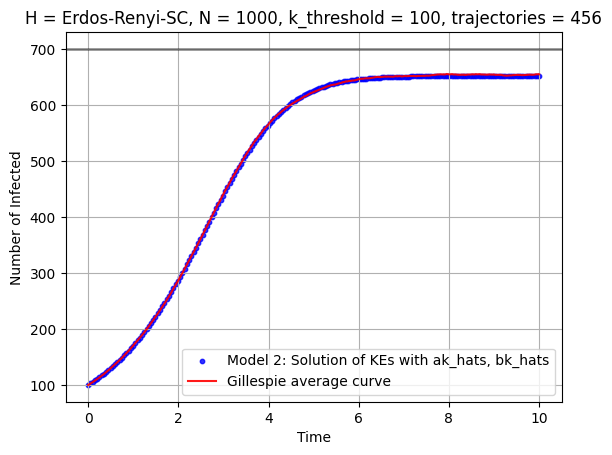

In [ ]:
plt.figure()

# plt.plot(sol.t, expected_values_hat, color="b", label="Model 2: Solution of KEs with ak_hats, bk_hats")
plt.scatter(sol_hat.t, expected_values_hat, color="b", s=10, alpha=.8, label="Model 2: Solution of KEs with ak_hats, bk_hats")

plt.plot(times, avg_curve, 'red', label="Gillespie average curve", alpha=0.9)

plt.axhline(y=int(0.7 * N), color='black', lw=2, alpha=0.4, linestyle='-')

plt.xlabel("Time")
plt.ylabel("Number of Infected")
plt.legend()
plt.grid(True)
plt.title(f"H = {g.name}, N = {N}, k_threshold = {k_threshold}, trajectories = {len(X_sims)}")
plt.savefig(f"../figures/estimation/{test_name}/solutions-comparison.pdf", 
            format='pdf', bbox_inches='tight')
plt.show()